In [1]:
import os
# os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
# os.environ["CUDA_VISIBLE_DEVICES"] = "2"
# os.environ['PYOPENGL_PLATFORM'] = 'egl'

from src.data_gen_utils import *
import trimesh
import pyrender

from os import path
import h5py

import multiprocessing as mp

547b3284875a6ce535deb3b0c692a2a.hdf5
0.11969656330741885


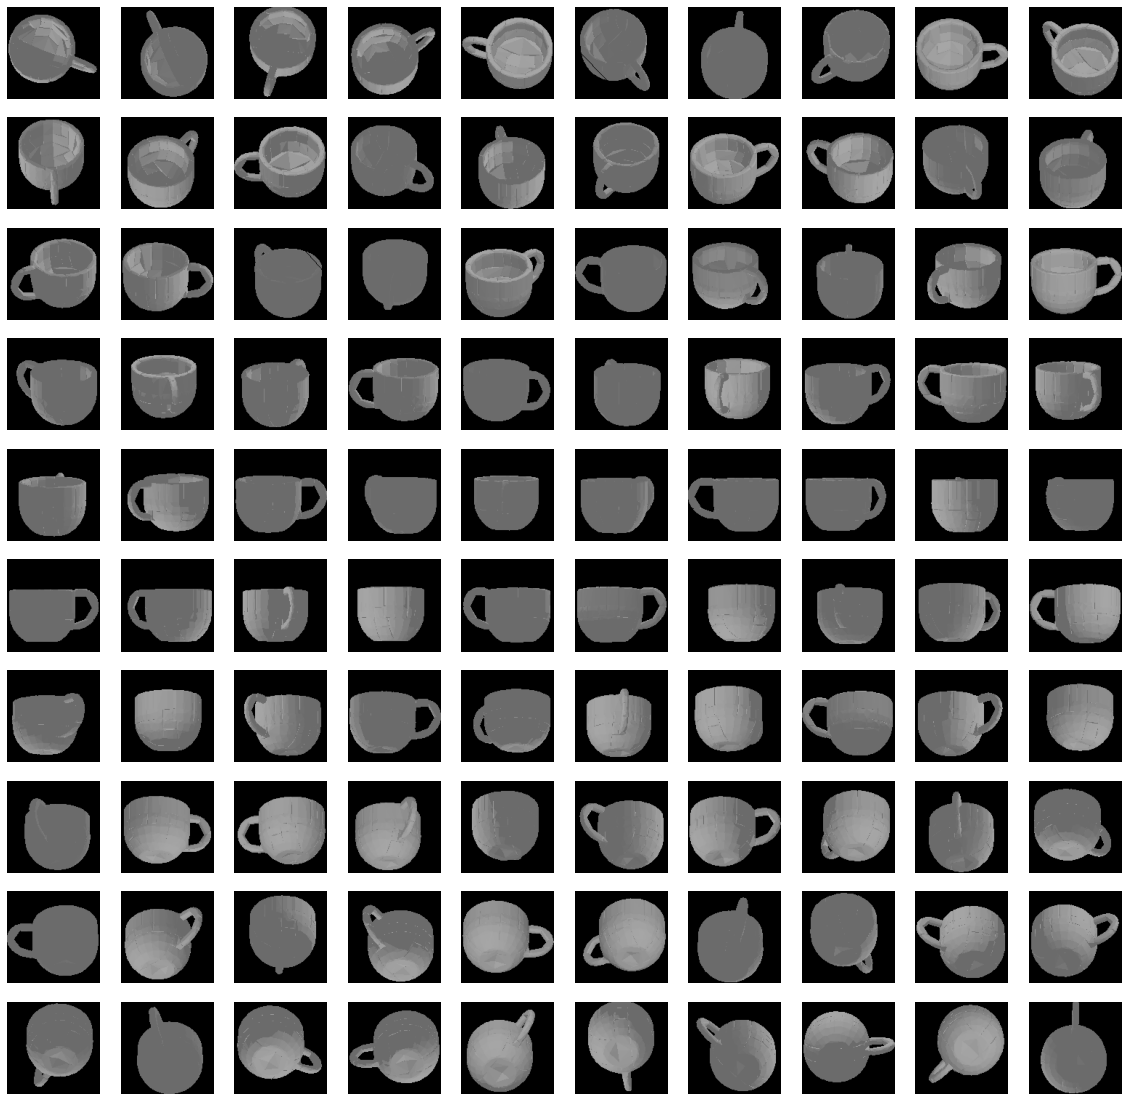

In [ ]:
load_dir = 'data/object'
mesh_dir = 'data/meshes_coll'
save_dir = 'data/camera_rai'

def start_process():
    print('Starting', mp.current_process().name)

def saveImageData(filename):
    print(filename)
    
    data_obj = h5py.File(path.join(load_dir, filename), mode='r')
    size = data_obj['size'][()]
    mesh_name = data_obj['filename'][()].decode()
    data_obj.close()
    
    print(size)
    
    mesh_filename = path.join(mesh_dir, mesh_name)
    rgb, cam_trans, cam_projection = render_mesh_rai(mesh_filename, 
                                                     num_cam = 100, 
                                                     mu_cam_distance = 2.2,
                                                     sig_cam_distance = 0.3, 
                                                     obj_radius = size, 
                                                     res = 128,
                                                     view = True)
    
#     data = h5py.File(path.join(save_dir, filename), mode='w')
#     data.create_dataset("rgb", data=rgb)
#     data.create_dataset("cam_extrinsic", data=cam_trans)
#     data.create_dataset("cam_intrinsic", data=cam_projection)
#     data.close()
    
    
    
filename_list = [fn for fn in os.listdir(load_dir) if fn.endswith('.hdf5')]
saveImageData(filename_list[0])
# pool = mp.Pool(processes=7,
#                initializer=start_process)
# outputs = pool.map(saveImageData, filename_list)

# pool.close() # no more tasks
# pool.join()  # wrap up current tasks

e9499e4a9f632725d6e865157050a80e.hdf5
0.12472183358381608


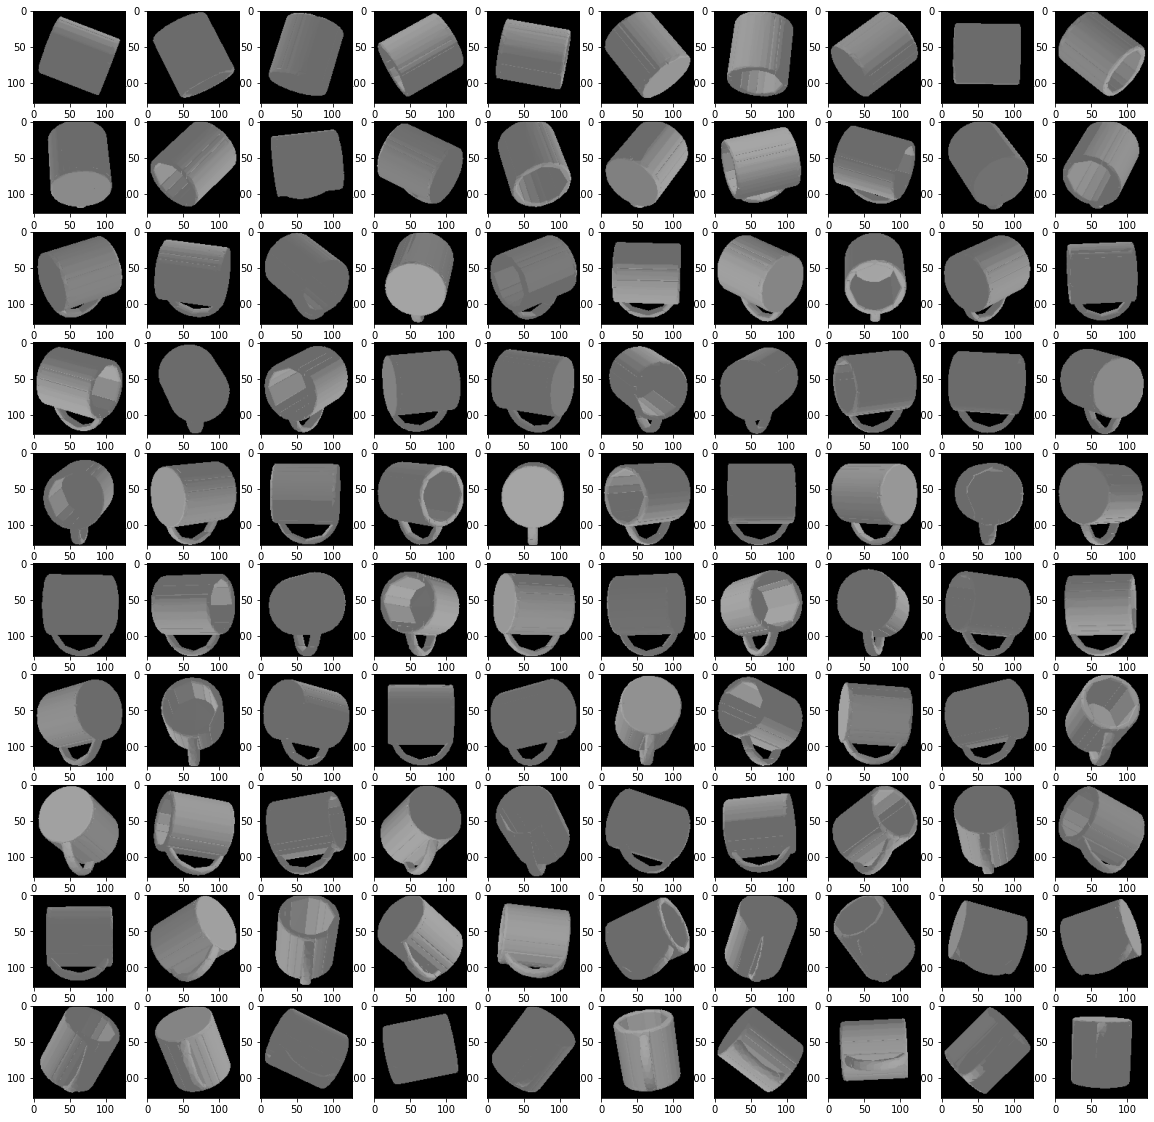

In [3]:
saveImageData(filename_list[1])

In [4]:
load_dir = 'data/object'
mesh_dir = 'data/meshes'
save_dir = 'data/shape'

filename_list = [fn for fn in os.listdir(load_dir) if fn.endswith('.hdf5')]
for i, filename in enumerate(filename_list):
    print('{}/{}: {}'.format(i, len(filename_list), filename))
    
    data_obj = h5py.File(path.join(load_dir, filename), mode='r')
    size = data_obj['size'][()]
    mesh_name = data_obj['filename'][()].decode()
    data_obj.close()
    
    
    mesh_filename = path.join(mesh_dir, mesh_name)
    object_trimesh = trimesh.load(mesh_filename)

    points, sdf = compute_sdf(object_trimesh, 
                              N = 5000, 
                              sig = 0.01,
                              scale = size,
                              view = False)
    
    data = h5py.File(path.join(save_dir, filename), mode='w')
    data.create_dataset("point", data=points)
    data.create_dataset("sdf", data=sdf)

    data.close()

0/137: 547b3284875a6ce535deb3b0c692a2a.hdf5
1/137: e9499e4a9f632725d6e865157050a80e.hdf5
2/137: e79d807e1093c6174e716404e6ec3a5f.hdf5
3/137: fad118b32085f3f2c2c72e575af174cd.hdf5
4/137: bed29baf625ce9145b68309557f3a78c.hdf5
5/137: 1305b9266d38eb4d9f818dd0aa1a251.hdf5
6/137: 9c930a8a3411f069e7f67f334aa9295c.hdf5
7/137: 6500ccc65e210b14d829190312080ea3.hdf5
8/137: 214dbcace712e49de195a69ef7c885a4.hdf5
9/137: 5c7c4cb503a757147dbda56eabff0c47.hdf5
10/137: 6e884701bfddd1f71e1138649f4c219.hdf5
11/137: 79e673336e836d1333becb3a9550cbb1.hdf5
12/137: 141f1db25095b16dcfb3760e4293e310.hdf5
13/137: 1d18255a04d22794e521eeb8bb14c5b3.hdf5
14/137: c6bc2c9770a59b5ddd195661813efe58.hdf5
15/137: 599e604a8265cc0a98765d8aa3638e70.hdf5
16/137: f1e439307b834015770a0ff1161fa15a.hdf5
17/137: ca198dc3f7dc0cacec6338171298c66b.hdf5
18/137: 2d10421716b16580e45ef4135c266a12.hdf5
19/137: b88bcf33f25c6cb15b4f129f868dedb.hdf5
20/137: 6faf1f04bde838e477f883dde7397db2.hdf5
21/137: 73b8b6456221f4ea20d3c05c08e26f.hdf5
22/1